In [3]:
import numpy as np
import matplotlib.pyplot as plt
import src.time_indep_algorithm as tia

All columns are the same symetrically. 

Converged after 5845 iterations with error 9.997455e-09 



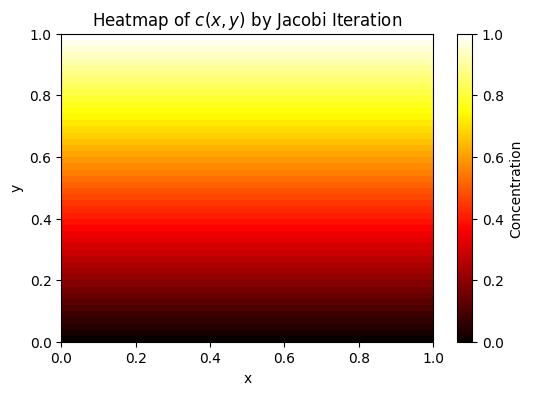

Maximum error: 3.036276e-06


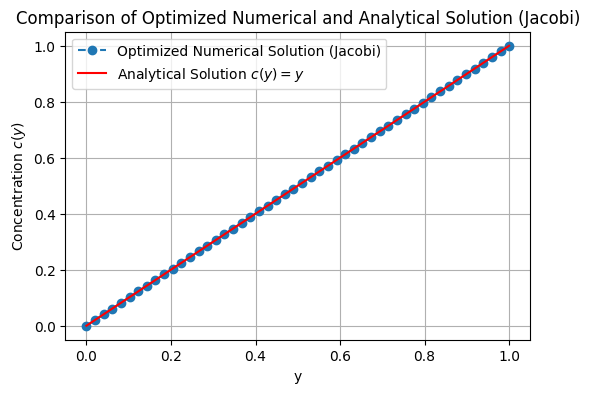

In [10]:
# run the Jacobi iteration
optimized_concentration, iteration, delta = tia.jacobi_parallel()

# check each column is the same symetrically
for i in range(1, optimized_concentration.shape[1] // 2):
    np.allclose(optimized_concentration[:, i], optimized_concentration[:, -i])
print("All columns are the same symetrically. \n")
print(f"Converged after {iteration} iterations with error {delta:.6e} \n")

# plot the heatmap of the optimized concentration
plt.figure(figsize=(6, 4))
plt.imshow(optimized_concentration, cmap="hot", aspect="auto", origin="upper",extent=[0, 1, 1, 0])
plt.colorbar(label="Concentration")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of $c(x, y)$ by Jacobi Iteration")
plt.gca().invert_yaxis()  # invert y-axis to match the analytical solution
plt.savefig("./fig/heatmap_jacobi.png")
plt.show()

c_y_numerical_optimized = np.mean(optimized_concentration, axis=1)
y_values_optimized = np.linspace(0, 1, len(c_y_numerical_optimized))

# calculate the maximum error
max_error_optimized = np.max(np.abs(c_y_numerical_optimized - y_values_optimized))
print(f"Maximum error: {max_error_optimized:.6e}")

# plot the numerical solution
plt.figure(figsize=(6, 4))
plt.plot(y_values_optimized, c_y_numerical_optimized, label="Optimized Numerical Solution (Jacobi)", linestyle="--", marker="o")
plt.plot(y_values_optimized, y_values_optimized, label="Analytical Solution $c(y) = y$", linestyle="-", color="r")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Optimized Numerical and Analytical Solution (Jacobi)")
plt.grid(True)
plt.savefig("./fig/numerical_vs_analytical_jacobi.png")
plt.show()


Converged after 1420 iterations with error 9.975387e-06


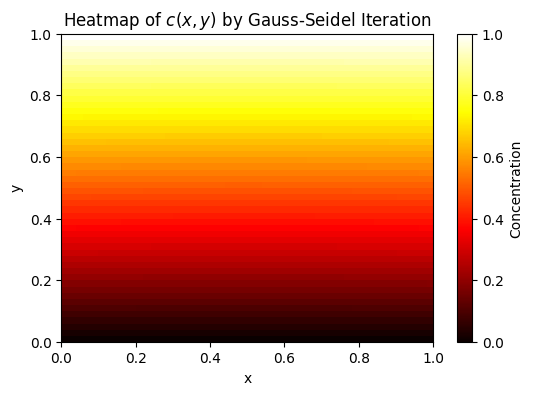

Maximum error: 1.508944e-03


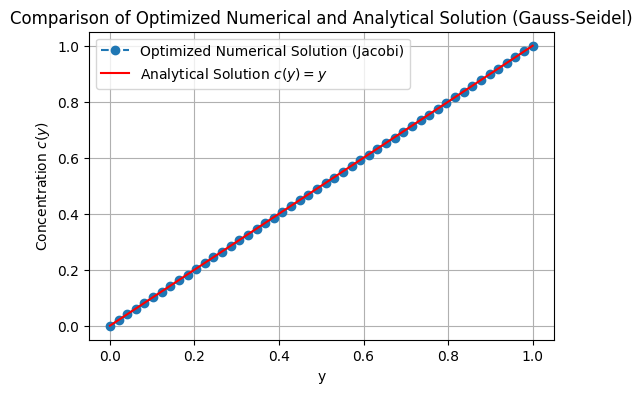

In [11]:
# run the Gauss-Seidel iteration
optimized_concentration, iteration, delta = tia.gauss_seidel_seq()
print(f"Converged after {iteration} iterations with error {delta:.6e}")

# plot the heatmap of the optimized concentration
plt.figure(figsize=(6, 4))
plt.imshow(optimized_concentration, cmap="hot", aspect="auto", origin="upper",extent=[0, 1, 1, 0])
plt.colorbar(label="Concentration")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of $c(x, y)$ by Gauss-Seidel Iteration")
plt.gca().invert_yaxis()  # invert y-axis to match the analytical solution
plt.savefig("./fig/heatmap_gauss_seidel.png")
plt.show()

# print(optimized_concentration[:, 0])
# print(optimized_concentration[:, 1])
# print(optimized_concentration[:, 2])
# print(optimized_concentration[:, -2])
c_y_numerical_optimized = np.mean(optimized_concentration, axis=1)
y_values_optimized = np.linspace(0, 1, len(c_y_numerical_optimized))

# calculate the maximum error
max_error_optimized = np.max(np.abs(c_y_numerical_optimized - y_values_optimized))
print(f"Maximum error: {max_error_optimized:.6e}")

# plot the numerical solution
plt.figure(figsize=(6, 4))
plt.plot(y_values_optimized, c_y_numerical_optimized, label="Optimized Numerical Solution (Jacobi)", linestyle="--", marker="o")
plt.plot(y_values_optimized, y_values_optimized, label="Analytical Solution $c(y) = y$", linestyle="-", color="r")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Optimized Numerical and Analytical Solution (Gauss-Seidel)")
plt.grid(True)
plt.savefig("./fig/numerical_vs_analytical_gauss_seidel.png")
plt.show()